# Text Classification 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data source : https://www.kaggle.com/datasets/timilsinabimal/newsarticlecategories

In [2]:
df = pd.read_csv('./data/news-article-categories.csv')
df.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [76]:
df['category'].unique(), df['category'].nunique()

(array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
        'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
        'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object),
 14)

<Axes: xlabel='category'>

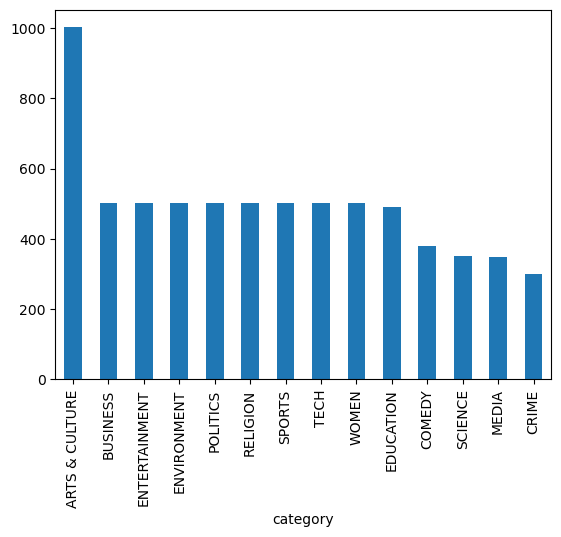

In [77]:
df['category'].value_counts().plot(kind='bar')

In [78]:
from helpers import split_dataset

Xtr, Xte, ytr, yte = split_dataset(df['title'], df['category'])
Xtr.shape , Xte.shape

((5502,), (1375,))

In [79]:
Xtr[:5]

2965    ‘Stranger Things’ Announces Season 3 Now In Pr...
6725    When I Realized That My 'Me Too's' Were Too Ma...
5014    Trump Alienates Yet Another Key Group Of GOP V...
6557    Woman Says Man Sexually Assaulted Her While Sh...
3465                   Extreme Weather Photos Of The Week
Name: title, dtype: object

In [80]:
df_test = pd.DataFrame({'title': Xte, 'category': yte})
df_test.head()

,title,category
73,Canoe Found After Hurricane Irma Eyed As Piece...,ARTS & CULTURE
3350,Pika's Moss-Eating Habit May Help Creature Ada...,ENVIRONMENT
427,'Hamilton' Star Wayne Brady Says To 'Fight For...,ARTS & CULTURE
1169,Nothing To Fear But Yourself: Female Leadershi...,BUSINESS
4427,Top Interior Department Official In Email To S...,POLITICS


In [81]:
df = {'title': Xtr, 'category': ytr}
df = pd.DataFrame(df, columns=['title', 'category'])
df.head()

,title,category
2965,‘Stranger Things’ Announces Season 3 Now In Pr...,ENTERTAINMENT
6725,When I Realized That My 'Me Too's' Were Too Ma...,WOMEN
5014,Trump Alienates Yet Another Key Group Of GOP V...,RELIGION
6557,Woman Says Man Sexually Assaulted Her While Sh...,WOMEN
3465,Extreme Weather Photos Of The Week,ENVIRONMENT


## Generative Naive Bayes 

In [82]:
cats = df['category'].unique().tolist()
cats

['ENTERTAINMENT',
 'WOMEN',
 'RELIGION',
 'ENVIRONMENT',
 'COMEDY',
 'SPORTS',
 'BUSINESS',
 'TECH',
 'POLITICS',
 'ARTS & CULTURE',
 'EDUCATION',
 'CRIME',
 'SCIENCE',
 'MEDIA']

In [83]:
text = df['title'].astype(str).str.cat(sep=' ')
print(text[:1000])

‘Stranger Things’ Announces Season 3 Now In Production With A Cool, New Teaser When I Realized That My 'Me Too's' Were Too Many To Count Trump Alienates Yet Another Key Group Of GOP Voters Woman Says Man Sexually Assaulted Her While She Slept On A Flight Extreme Weather Photos Of The Week Tracy Morgan's Superhero 'Can Hear Things On Porno That You Can't Hear' Yankees' Derek Jeter Ceremony Spurs Memories Of A Vulnerable Iron Horse Climate Change Threats To 'The Least Of These' Compel Evangelical Christians To Act Uber Halts Self-Driving Car Tests In California, Where It Didn't Test Much Anyway This App Sends Alerts When Donald Trump Tweets About Stocks You Own Adopt A Pet In New York City; Featured Animals For 2/2/2014, Courtesy Of NYC's Animal Care & Control (PHOTOS) This 70-Year-Old Lady Wasn't Ready For Her First Self-Driving Car Ride Cat Is Living Better Than You Lupe Valdez Could Make History As Texas’ First Hispanic Governor Ivanka Trump Will Skip Her Book Tour Due To Ethical Conc

In [84]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = [ w.strip() for w in text.split() if w not in stopwords.words('english') and len(w) > 1]
    text = ' '.join(text)
    return text

text = clean_text(text)
print(text[:1000])

stranger things announces season production cool new teaser realized toos many count trump alienates yet another key group gop voters woman says man sexually assaulted slept flight extreme weather photos week tracy morgans superhero hear things porno cant hear yankees derek jeter ceremony spurs memories vulnerable iron horse climate change threats least compel evangelical christians act uber halts self driving car tests california didnt test much anyway app sends alerts donald trump tweets stocks adopt pet new york city featured animals 222014 courtesy nycs animal care control photos 70 year old lady wasnt ready first self driving car ride cat living better lupe valdez could make history texas first hispanic governor ivanka trump skip book tour due ethical concerns dont blame batteries every lithium ion explosion hey adults stop telling gamers stop gaming instead respect redirect bald eagle flies water bullards bar photo rudy giuliani trump wont interview mueller get spygate report col

<Figure size 1000x1000 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

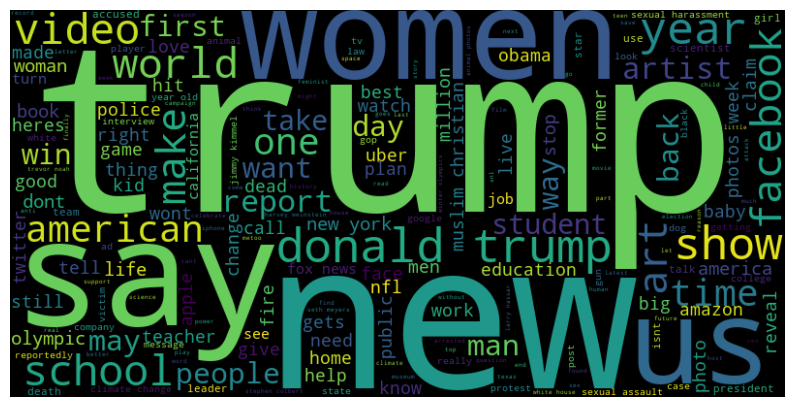

In [85]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
words = text.split()
len(words) , len(set(words))

(40175, 10874)

In [87]:
from collections import Counter
word_freq = Counter(words)
word_freq.most_common(10)

[('trump', 387),
 ('new', 291),
 ('says', 164),
 ('us', 136),
 ('women', 133),
 ('donald', 126),
 ('sexual', 113),
 ('trumps', 112),
 ('photos', 111),
 ('first', 108)]

In [88]:
word_dict = dict(word_freq)
len(word_dict)

10874

#### Threshold cutoff 

In [89]:
for l in range(1,11):
    c= 0
    for i in word_freq.items():
        if i[1] == l:
            c += 1
    print(f'#words with #occurrences == {l} : {c}')    

#words with #occurrences == 1 : 5775
#words with #occurrences == 2 : 1734
#words with #occurrences == 3 : 908
#words with #occurrences == 4 : 529
#words with #occurrences == 5 : 341
#words with #occurrences == 6 : 247
#words with #occurrences == 7 : 225
#words with #occurrences == 8 : 157
#words with #occurrences == 9 : 110
#words with #occurrences == 10 : 106


In [90]:
min_occ_threshold = 1
remove_words = [word for word in word_dict if word_dict[word] < min_occ_threshold]
len(remove_words)

0

In [91]:
words = set(words) - set(remove_words)
len(words)

10874

In [92]:
word_dict = np.zeros((len(cats), len(set(words)) + 1 )) # +1 for unknown words
word_dict.shape

(14, 10875)

In [93]:
# cats_text = {}
# for cat in cats:
#     text = df[df['category'] == cat]['title'].astype(str).str.cat(sep=' ')
#     text = clean_text(text)
#     cats_text[cat] = text

# for i, cat in enumerate(cats):
#     word_c = cats_text[cat].split()
#     word_freq = Counter(word_c)
#     for j, word in enumerate(set(word_c)):
#         word_dict[i, j] = word_freq[word]

# word_dict[:5, :5]

In [94]:
# word_dict.shape
# cats_text[cats[1]][:1000]

## 1.4.2 Generate random text

In [95]:
class NaiveBayesTextGenerator:
    def __init__(self, cats, word_dict,words):
        self.cats = cats
        self.word_dict = word_dict
        self.words = words
    
    def generate_text(self, category, num_words=100):
        # catrgorical 
        cat_choose = np.random.choice(self.cats, p=[1/len(self.cats) for _ in range(len(self.cats))])
        print(f'category chosen: {cat_choose}')
        cat_choose = self.cats.index(cat_choose)
        word_probs = self.word_dict[cat_choose] / self.word_dict[cat_choose].sum()
        # multinomial 
        words_gen = np.random.choice(list(set(self.words)), size=num_words, p=word_probs)
        return ' '.join(words_gen)

In [96]:
# nb = NaiveBayesTextGenerator(cats, word_dict,words)
# nb.generate_text(cats[0], 10) 
# nb.generate_text(cats[0], 10) 
# nb.generate_text(cats[0], 10) 

## 1.4.4 Inference 

In [97]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

### Preprocessing - tokenization w2v (manual count)

In [98]:
unknown_token = '<UNKNOWN>'

words = list(words) 
vocab = sorted(set(words)) + [unknown_token]

In [99]:
n_classes = len(cats)
vocab_size = len(vocab)
n_classes, vocab_size

(14, 10875)

In [100]:
Prior = torch.zeros(n_classes)
Likelihood = torch.zeros(n_classes, vocab_size)
Prior.shape, Likelihood.shape

(torch.Size([14]), torch.Size([14, 10875]))

In [101]:
for it , row in enumerate(df.iterrows()):
    cat = row[1]['category']
    title = row[1]['title']
    title = clean_text(title)
    words_t = title.split()
    idx_cat = cats.index(cat)
    Prior[idx_cat] += 1
    for word in words_t:
        idx_voc = vocab.index(word) if word in vocab else -1 
        Likelihood[idx_cat, idx_voc] += 1

Prior

tensor([409., 397., 400., 401., 308., 411., 397., 386., 401., 805., 376., 252.,
        279., 280.])

In [102]:
Prior = Prior / Prior.sum()
Prior

tensor([0.0743, 0.0722, 0.0727, 0.0729, 0.0560, 0.0747, 0.0722, 0.0702, 0.0729,
        0.1463, 0.0683, 0.0458, 0.0507, 0.0509])

In [103]:
counts_cat = Likelihood.sum(dim = 1)
counts_cat

tensor([3289., 2675., 2530., 2934., 2400., 3366., 2680., 2703., 3329., 5496.,
        2328., 2054., 2001., 2390.])

#### smoothing

In [104]:
alpha = 1
Likelihood = (Likelihood + alpha) / (counts_cat.view(-1,1) + vocab_size* alpha)
Likelihood[:5, :5]

tensor([[2.8241e-04, 7.0602e-05, 7.0602e-05, 7.0602e-05, 7.0602e-05],
        [1.4760e-04, 7.3801e-05, 7.3801e-05, 7.3801e-05, 7.3801e-05],
        [7.4599e-05, 7.4599e-05, 7.4599e-05, 1.4920e-04, 7.4599e-05],
        [2.8967e-04, 7.2417e-05, 7.2417e-05, 7.2417e-05, 7.2417e-05],
        [1.5066e-04, 7.5330e-05, 7.5330e-05, 7.5330e-05, 7.5330e-05]])

In [105]:
random_example = df.sample()
random_example

,title,category
4122,"U.S., China Putting Trade War On Hold, Treasur...",POLITICS


In [106]:
X_i = random_example['title'].values[0]
X_i = clean_text(X_i)
X_i = X_i.split() 
X_i

['us',
 'china',
 'putting',
 'trade',
 'war',
 'hold',
 'treasurys',
 'steve',
 'mnuchin',
 'says']

In [107]:
y_i = random_example['category'].values[0]
y_i

'POLITICS'

In [108]:
Prob_y_k_X_i = torch.zeros(n_classes)
for y_k in cats:
    idx_cat = cats.index(y_k)
    prob = Prior[idx_cat].item()
    for word in X_i:
        if word in vocab:
            prob *= Likelihood[idx_cat, vocab.index(word)].item()
        else:
            prob *= Likelihood[idx_cat, -1].item()
    print(f'P({y_k:>15}|X_i) = {prob:.10}')
    Prob_y_k_X_i[idx_cat] = prob

P(  ENTERTAINMENT|X_i) = 6.660932504e-40
P(          WOMEN|X_i) = 3.098738262e-40
P(       RELIGION|X_i) = 3.143086479e-40
P(    ENVIRONMENT|X_i) = 6.798899696e-40
P(         COMEDY|X_i) = 2.371468481e-40
P(         SPORTS|X_i) = 8.883344558e-40
P(       BUSINESS|X_i) = 4.192701224e-38
P(           TECH|X_i) = 1.475661794e-39
P(       POLITICS|X_i) = 8.175619738e-38
P( ARTS & CULTURE|X_i) = 3.656763309e-40
P(      EDUCATION|X_i) = 5.094742666e-41
P(          CRIME|X_i) = 2.737317741e-41
P(        SCIENCE|X_i) = 4.372176565e-41
P(          MEDIA|X_i) = 1.031789438e-40


In [109]:
Predicted_class = cats[Prob_y_k_X_i.argmax().item()]

In [110]:
Predicted_class , y_i

('POLITICS', 'POLITICS')

#### putting all together

In [119]:
def predict_category(title):
    title = clean_text(title)
    title = title.split()
    Prob_y_k_X_i = torch.zeros(n_classes)
    for y_k in cats:
        idx_cat = cats.index(y_k)
        prob = Prior[idx_cat].item()
        for word in title:
            if word in vocab:
                prob *= Likelihood[idx_cat, vocab.index(word)].item()
            else:
                prob *= Likelihood[idx_cat, -1].item()
        Prob_y_k_X_i[idx_cat] = prob
    return cats[Prob_y_k_X_i.argmax().item()]

k = df.sample()
print('\"' ,k['title'].values[0] ,'\"' , k['category'].values[0])
yp = predict_category(k['title'].values[0])
yp 
if yp == k['category'].values[0]:
    print('Correct  ✅')
else:
    print('Incorrect ❌')

" Watch 15 Years Of Earthquakes Rock The Planet " SCIENCE


'SCIENCE'

Correct  ✅


In [112]:
def predict(X):
    return [predict_category(x) for x in X]

X = df['title'].values
y = df['category'].values

y_pred = predict(X)

np.array(y_pred == y).mean()

0.9362050163576882

In [113]:
X = df_test['title'].values
y = df_test['category'].values

y_pred = predict(X)

np.array(y_pred == y).mean()

0.6210909090909091

# implementing Naive Bayes as a Class

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
from naiveBayes import NaiveBayes

## Twitter Dataset 1.6M

Data source : https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset 


In [5]:
folder = './data/twitter/'

Xtr = pd.read_csv(folder + 'train.csv',encoding='latin1')
Xtr.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
Xtr.shape

(27481, 10)

In [7]:
Xte = pd.read_csv(folder + 'test.csv',encoding='latin1')
Xte.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
Xte.shape

(4815, 9)

In [9]:
Xtr = Xtr[['text', 'sentiment']]
Xtr.columns = ['text', 'label']
Xtr.head()

,text,label
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [10]:
Xte = Xte[['text', 'sentiment']]
Xte.columns = ['text', 'label']
Xte.head()

,text,label
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [11]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'-', ' ', text)
    text = [ w.strip() for w in text.split() if w not in stopwords.words('english') and len(w) > 1]
    text = ' '.join(text)
    return text


In [12]:
Xtr['Proctext'] = Xtr['text'].astype(str).apply(clean_text)
Xtr.head()

,text,label,Proctext
0,"I`d have responded, if I were going",neutral,"i`d responded, going"
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego!!!
2,my boss is bullying me...,negative,boss bullying me...
3,what interview! leave me alone,negative,interview! leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"sons ****, couldn`t put releases already bought"


In [13]:
Xte['Proctext'] = Xte['text'].astype(str).apply(clean_text)
Xte.head(10)

,text,label,Proctext
0,Last session of the day http://twitpic.com/67ezh,neutral,last session day
1,Shanghai is also really exciting (precisely -...,positive,shanghai also really exciting (precisely skysc...
2,"Recession hit Veronique Branquinho, she has to...",negative,"recession hit veronique branquinho, quit compa..."
3,happy bday!,positive,happy bday!
4,http://twitpic.com/4w75p - I like it!!,positive,like it!!
5,that`s great!! weee!! visitors!,positive,that`s great!! weee!! visitors!
6,I THINK EVERYONE HATES ME ON HERE lol,negative,think everyone hates lol
7,"soooooo wish i could, but im in school and my...",negative,"soooooo wish could, im school myspace complete..."
8,and within a short time of the last clue all ...,neutral,within short time last clue
9,What did you get? My day is alright.. haven`...,neutral,get? day alright.. haven`t done anything yet. ...


In [14]:
def clean_text_2(text):
    text = text.lower()
    text = re.sub(r'\'s', ' is', text)
    text = re.sub(r'`s', ' is', text)
    text = re.sub(r'n\'t', ' not', text)
    text = re.sub(r'n`t', ' not', text)
    text = re.sub(r'\'re', ' are', text)
    text = re.sub(r'`re', ' are', text)
    text = re.sub(r'\'m', ' am', text)
    text = re.sub(r'`m', ' am', text)
    text = re.sub(r'\'ll', ' will', text)
    text = re.sub(r'`ll', ' will', text)
    text = re.sub(r'\'d', ' would', text)
    text = re.sub(r'`d', ' would', text)
    text = re.sub(r'\'ve', ' have', text)
    text = re.sub(r'`ve', ' have', text)
    text = re.sub(r'[*]{2}[*]*', 'cussword', text)
    text = re.sub(r'[#]{2}[#]*', 'cussword', text)
    
    text = re.sub(r'[^A-Za-z\s]+', '', text)
    text = [ w.strip() for w in text.split() if w not in stopwords.words('english') and len(w) > 1]
    text = ' '.join(text)
    return text

Xte['Proctext'] = Xte['Proctext'].astype(str).apply(clean_text_2)
Xte.head(10)

,text,label,Proctext
0,Last session of the day http://twitpic.com/67ezh,neutral,last session day
1,Shanghai is also really exciting (precisely -...,positive,shanghai also really exciting precisely skyscr...
2,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho quit compan...
3,happy bday!,positive,happy bday
4,http://twitpic.com/4w75p - I like it!!,positive,like
5,that`s great!! weee!! visitors!,positive,great weee visitors
6,I THINK EVERYONE HATES ME ON HERE lol,negative,think everyone hates lol
7,"soooooo wish i could, but im in school and my...",negative,soooooo wish could im school myspace completel...
8,and within a short time of the last clue all ...,neutral,within short time last clue
9,What did you get? My day is alright.. haven`...,neutral,get day alright done anything yet leaving soon...


In [15]:
Xtr['Proctext'] = Xtr['Proctext'].apply(clean_text_2)
Xtr.head(10)

,text,label,Proctext
0,"I`d have responded, if I were going",neutral,would responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bullying
3,what interview! leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons cussword could put releases already bought
5,http://www.dothebouncy.com/smf - some shameles...,neutral,shameless plugging best rangers forum earth
6,2am feedings for the baby are fun when he is a...,positive,feedings baby fun smiles coos
7,Soooo high,neutral,soooo high
8,Both of you,neutral,
9,Journey!? Wow... u just became cooler. hehe....,positive,journey wow became cooler hehe possible


<Axes: xlabel='label'>

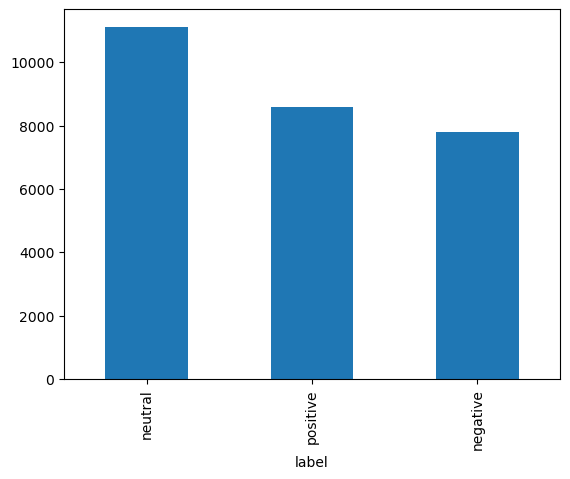

In [16]:
Xtr['label'].value_counts().plot(kind='bar')

In [17]:
Xtr.dropna(inplace=True)
Xtr.tail(10)

,text,label,Proctext
27471,"i`m defying gravity. and nobody in alll of oz,...",neutral,defying gravity nobody alll oz wizard ever gon...
27472,http://twitpic.com/663vr - Wanted to visit the...,negative,wanted visit animals late
27473,in spoke to you yesterday and u didnt respond...,neutral,spoke yesterday didnt respond girl wassup though
27474,So I get up early and I feel good about the da...,positive,get early feel good day walk work feeling alri...
27475,enjoy ur night,positive,enjoy ur night
27476,wish we could come see u on Denver husband l...,negative,wish could come see denver husband lost job ca...
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,positive,worth cussword
27480,All this flirting going on - The ATG smiles...,neutral,flirting going atg smiles yay hugs


In [18]:
Xte.dropna(inplace=True)
Xte.tail(10)

,text,label,Proctext
3524,My hair dresser passed away yesterday from bre...,neutral,hair dresser passed away yesterday breast canc...
3525,"I was supposed to go tomorrow tooooo, but hav...",neutral,supposed go tomorrow tooooo use gas ticket mon...
3526,The best thing I have ever done is carry and b...,positive,best thing ever done carry birth child
3527,"..my mother just WON the City of Terrell, Texa...",positive,mother city terrell texas district city counci...
3528,"Friday evening......what to do, what to do. I...",neutral,friday eveningwhat idea
3529,"its at 3 am, im very tired but i can`t sleep ...",negative,im tired ca sleep try
3530,All alone in this old house again. Thanks for...,positive,alone old house thanks net keeps alive kicking...
3531,I know what you mean. My little dog is sinkin...,negative,know mean little dog sinking depression wants ...
3532,_sutra what is your next youtube video gonna b...,positive,sutra next youtube video gonna love videos
3533,http://twitpic.com/4woj2 - omgssh ang cute n...,positive,omgssh ang cute ng bby


In [19]:
labels = Xtr.label.unique().tolist()
labels

['neutral', 'negative', 'positive']

In [20]:
labels = ['negative', 'neutral', 'positive']

In [21]:
Xtr['target'] = Xtr['label'].apply(lambda x: labels.index(x))
Xtr.head()

,text,label,Proctext,target
0,"I`d have responded, if I were going",neutral,would responded going,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego,0
2,my boss is bullying me...,negative,boss bullying,0
3,what interview! leave me alone,negative,interview leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",negative,sons cussword could put releases already bought,0


In [22]:
Xte['target'] = Xte['label'].apply(lambda x: labels.index(x))
Xte.head()

,text,label,Proctext,target
0,Last session of the day http://twitpic.com/67ezh,neutral,last session day,1
1,Shanghai is also really exciting (precisely -...,positive,shanghai also really exciting precisely skyscr...,2
2,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho quit compan...,0
3,happy bday!,positive,happy bday,2
4,http://twitpic.com/4w75p - I like it!!,positive,like,2


In [23]:
Xtrain , ytrain = Xtr['Proctext'].values, Xtr['target'].values 
Xtest , ytest = Xte['Proctext'].values, Xte['target'].values
Xtrain.shape , ytrain.shape , Xtest.shape , ytest.shape

((27480,), (27480,), (3534,), (3534,))

In [24]:
type(Xtrain), Xtrain[:5]

(numpy.ndarray,
 array(['would responded going', 'sooo sad miss san diego',
        'boss bullying', 'interview leave alone',
        'sons cussword could put releases already bought'], dtype=object))

In [25]:
xtext = Xtrain.astype(str)
xtext[:5]

array(['would responded going', 'sooo sad miss san diego',
       'boss bullying', 'interview leave alone',
       'sons cussword could put releases already bought'], dtype='<U129')

In [26]:
words = (' '.join(xtext)).split() 
len(words)
vocab = sorted(set(words)) + ['<UNKNOWN>']
len(vocab)
from collections import Counter
word_freq = Counter(words)
word_freq.most_common(10)

190169

26090

[('day', 2109),
 ('good', 1552),
 ('get', 1427),
 ('like', 1350),
 ('go', 1271),
 ('love', 1124),
 ('work', 1114),
 ('today', 1108),
 ('going', 1099),
 ('got', 1074)]

In [27]:
word_frq_dict = dict(word_freq)
len(word_frq_dict)
word_frq_dict['cussword']
sorted(word_frq_dict.items(), key=lambda x: x[1], reverse=False)[:10] 

26089

1023

[('responded', 1),
 ('bullying', 1),
 ('shameless', 1),
 ('feedings', 1),
 ('coos', 1),
 ('sharpie', 1),
 ('dangerously', 1),
 ('env', 1),
 ('sok', 1),
 ('marly', 1)]

In [28]:
for l in range(1,11):
    c= 0
    for i in word_freq.items():
        if i[1] == l:
            c += 1
    print(f'#words with #occurrences == {l} : {c}')    

#words with #occurrences == 1 : 16209
#words with #occurrences == 2 : 3198
#words with #occurrences == 3 : 1553
#words with #occurrences == 4 : 901
#words with #occurrences == 5 : 589
#words with #occurrences == 6 : 460
#words with #occurrences == 7 : 333
#words with #occurrences == 8 : 271
#words with #occurrences == 9 : 194
#words with #occurrences == 10 : 193


In [29]:
min_occ_threshold = 2
remove_words = [word for word in word_frq_dict if word_frq_dict[word] < min_occ_threshold]
len(remove_words)

16209

In [30]:
len(words) , len(set(words))

(190169, 26089)

In [31]:
unq_words = set(words) - set(remove_words)
len(unq_words)

9880

In [32]:
vocab = sorted(set(unq_words)) + ['<UNKNOWN>']
len(vocab)

9881

In [33]:
def words2Vector(xtext, vocab):
    df = pd.DataFrame( np.zeros((len(xtext), len(vocab))), columns=vocab)
    for i, text in enumerate(xtext):
        for word in text.split():
            if word in vocab:
                df.loc[i, word] += 1
            else :
                df.loc[i, '<UNKNOWN>'] += 1

    return df

Xtr_df = words2Vector(Xtrain, vocab)
Xtr_df.head()

,aaaa,aaaah,aaah,aaahhh,aaaw,aaawww,aah,aargh,aaron,ab,...,zoe,zombie,zombies,zone,zoo,zu,zulu,zune,zzzz,<UNKNOWN>
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train = Xtr_df.values
y_train = ytrain
X_train.shape, y_train.shape

((27480, 9881), (27480,))

In [35]:
Xte_df = words2Vector(Xtest, vocab)
Xte_df.head()

,aaaa,aaaah,aaah,aaahhh,aaaw,aaawww,aah,aargh,aaron,ab,...,zoe,zombie,zombies,zone,zoo,zu,zulu,zune,zzzz,<UNKNOWN>
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_test = Xte_df.values
y_test = ytest
X_test.shape, y_test.shape

((3534, 9881), (3534,))

In [39]:
my_nb = NaiveBayes()
priors, Likelihood = my_nb.fit(X_train, y_train, alpha=1)

In [40]:
priors , Likelihood

(array([-1.26175426, -0.90500222, -1.16378413]),
 array([[-8.26667844, -7.86121334, -8.95982562, ..., -8.95982562,
         -8.26667844, -0.88051743],
        [-8.62335339, -8.62335339, -8.21788828, ..., -8.62335339,
         -8.62335339, -0.89890674],
        [-9.05777177, -7.95915948, -8.36462459, ..., -8.36462459,
         -8.36462459, -0.91891502]]))

In [52]:
example = Xte.sample()
text_e = example['text'].values[0]
target_e = example['target'].values[0]
text_e, target_e

('Long day of dancin, travelin, and celebrating life  happy mothers day!!', 2)

In [54]:
def predict_category(title):
    cats = labels
    title = clean_text(title)
    title = clean_text_2(title)
    title = title.split()
    Prob_y_k_X_i = np.zeros(len(cats))
    for y_k in cats:
        idx_cat = cats.index(y_k)
        prob = priors[idx_cat]
        for word in title:
            if word in vocab:
                prob += Likelihood[idx_cat, vocab.index(word)]
            else:
                prob += Likelihood[idx_cat, vocab.index('<UNKNOWN>')]
        Prob_y_k_X_i[idx_cat] = prob
        print(prob)
    return cats[Prob_y_k_X_i.argmax()]

yp = predict_category(text_e)
yp , labels[target_e]
if yp == labels[target_e]:
    print('Correct  ✅')
else:
    print('Incorrect ❌')

-38.557236252229195
-36.72532321387882
-28.76821934410902


('positive', 'positive')

Correct  ✅


In [56]:
yp = my_nb.predict(X_test)
np.array(yp == y_test).mean()

0.6451612903225806

## Comparison with Sklearn's Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
ypred = nb.predict(X_test)
nb.score(X_test, y_test)

MultinomialNB()

0.6632710809281268

In [59]:
nb.class_log_prior_
priors


array([-1.2617736 , -0.904983  , -1.16379148])

array([-1.26175426, -0.90500222, -1.16378413])

In [60]:
nb.feature_log_prob_[0, :10]
Likelihood[0, :10] + (nb.feature_log_prob_[0,0] - Likelihood[0,0])

array([-10.39598626,  -9.99052115, -11.08913344, -10.39598626,
       -11.08913344, -10.39598626,  -9.99052115,  -9.99052115,
       -10.39598626, -10.39598626])

array([-10.39598626,  -9.99052115, -11.08913344, -10.39598626,
       -11.08913344, -10.39598626,  -9.99052115,  -9.99052115,
       -10.39598626, -10.39598626])